$\textbf{Forward problem : Implementing a simple simulation of wave propagation}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
from shapely.geometry import Point

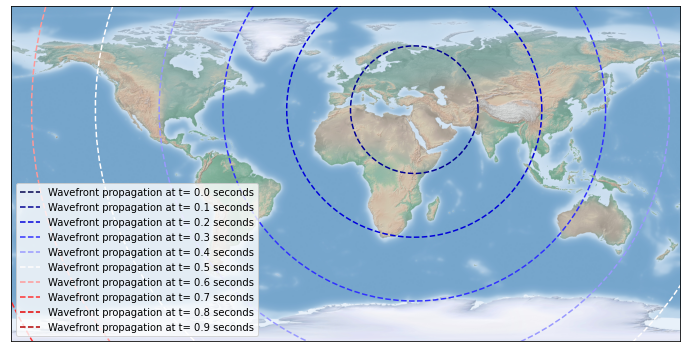

In [2]:
# Load STEC data
df = pd.read_csv('BSHM_230206.csv')
df['UTCTime'] = pd.to_datetime(df['UTCTime'], format='%y%m%d%H%M%S')
df['FormattedTime'] = df['UTCTime'].dt.strftime('%Y-%m-%d %H:%M:%S')
satellite_1 = 'GPS41'

df_gps41 = df[(df['sat'] == 'GPS41') & (df['FormattedTime'] >= '2023-01-01 01:00:00')]


# Extract latitude, longitude, and time columns
latitudes = df_gps41['ipplat'].values
longitudes = df_gps41['ipplon'].values
time_data = pd.to_datetime(df_gps41['FormattedTime'].values)
amplitudes = df_gps41['stec'].values

# Create a figure and subplot for circular motion
fig_map = plt.figure(figsize=(12, 8))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
m.shadedrelief(scale=0.2)



lon, lat = m(longitudes, latitudes)

# Plot the circular motion on the map
t = np.arange(0, 1, 0.1)
#print(t)
v = 343  # Speed of sound in air (m/s)
circle_radius = v * t  

for i in np.arange(len(t)):
    theta_vals = np.linspace(0, 2 * np.pi, 100)
    # Choose a color for each time step
    color = plt.cm.seismic(i / len(circle_radius))
    lon_circle, lat_circle = m(circle_radius[i] * np.cos(theta_vals) + longitudes[0], circle_radius[i] * np.sin(theta_vals) + latitudes[0])
    m.plot(lon_circle, lat_circle, color=color, linestyle='--', label=f'Wavefront propagation at t= {i * 0.1:.1f} seconds')

# Add legend
plt.legend()

plt.show()
